In [24]:
import keras
from keras.datasets import imdb
import numpy as np
(trainX, trainY),(testX, testY) = imdb.load_data(num_words=10000)

In [25]:
max([max(seq) for seq in trainX])


9999

In [26]:

def vectorize(x, dim=10000):
    vectorizedX = np.zeros((len(x),dim))
    for i,sequence in enumerate(x):
        vectorizedX[i][sequence] =1
    return vectorizedX

In [27]:
trainX = vectorize(trainX)
testX = vectorize(testX)

In [29]:
trainY = np.asarray(trainY)
testY = np.asarray(testY)


In [38]:
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [39]:
valX = trainX[:10000]
trainX = trainX[10000:]
valY = trainY[:10000]
trainY = trainY[10000:]


In [40]:
hist = model.fit(trainX, trainY,epochs = 20, batch_size = 512, validation_data= (valX,valY))

Epoch 1/20
10/10 [==============================] - 1s 77ms/step - loss: 0.6465 - accuracy: 0.6510 - val_loss: 0.5863 - val_accuracy: 0.8242
Epoch 2/20
10/10 [==============================] - 0s 18ms/step - loss: 0.5099 - accuracy: 0.8466 - val_loss: 0.5031 - val_accuracy: 0.8528
Epoch 3/20
10/10 [==============================] - 0s 18ms/step - loss: 0.4230 - accuracy: 0.8952 - val_loss: 0.4450 - val_accuracy: 0.8633
Epoch 4/20
10/10 [==============================] - 0s 17ms/step - loss: 0.3424 - accuracy: 0.9342 - val_loss: 0.4257 - val_accuracy: 0.8249
Epoch 5/20
10/10 [==============================] - 0s 18ms/step - loss: 0.2867 - accuracy: 0.9462 - val_loss: 0.3896 - val_accuracy: 0.8435
Epoch 6/20
10/10 [==============================] - 0s 18ms/step - loss: 0.2341 - accuracy: 0.9576 - val_loss: 0.3452 - val_accuracy: 0.8733
Epoch 7/20
10/10 [==============================] - 0s 17ms/step - loss: 0.1950 - accuracy: 0.9680 - val_loss: 0.3779 - val_accuracy: 0.8393
Epoch 8/20
10

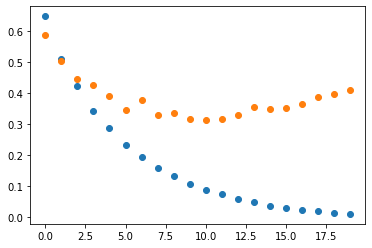

In [44]:
modelHist = hist.history
modelHist

import matplotlib.pyplot as plt
plt.scatter(range(len(modelHist['loss'])),modelHist['loss'])
plt.scatter(range(len(modelHist['loss'])),modelHist['val_loss'])

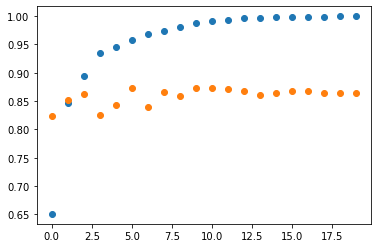

In [45]:
plt.scatter(range(len(modelHist['loss'])),modelHist['accuracy'])
plt.scatter(range(len(modelHist['loss'])),modelHist['val_accuracy'])

In [46]:
evaluate = model.evaluate(testX,testY)

782/782 [==============================] - 1s 827us/step - loss: 0.4393 - accuracy: 0.8526
